In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [2]:
pip install Sastrawi

     |████████████████████████████████| 215kB 4.1MB/s 


In [4]:
#Print Text
f = open("news.txt", "r")
text=f.read()
print("\nText:\n----------------\n",text)


Text:
----------------
 Sejak sebulan terakhir harga bawang putih dan bombay yang sempat
melonjak tinggi akhirnya kembali turun dan stabil di rata-rata Rp. 20.000 per 
kg. Namun, berkah harga murah yang dinikmati masyarakat kembali terusik
dengan mulai naiknya harga bawang putih di pasar. Pemerhati Pertanian, 
Syaiful Bahari, menjelaskan masalah kenaikan harga komoditi yang terkait
dengan impor seperti bawang putih, bombay dan gula, selama ini lebih 
banyak disebabkan oleh kebijakan restriksi atau pembatasan yang
diberlakukan oleh pemerintah sendiri. Untuk kasus bawang putih dan 
bombay, lanjut Syaiful, ketika relaksasi diberlakukan terbukti harga turun
drastis. Bombay dari Rp 150.000 per kilo gram menjadi Rp 17.000 sampai Rp. 
20.000 per kilo gram. Sehingga kedua komoditi ini menyumbang deflasi.


In [5]:
#Preprocessing
text = text.lower()
print("\nHuruf kecil semua:\n----------------\n",text)
text = re.sub(r"\d+", "", text)
print("\nAngka hilang:\n----------------\n",text)
text = text.translate(str.maketrans("","",string.punctuation))
print("\nTanda Baca hilang:\n----------------\n",text)
text = text.strip()
print("\nKarakter Kosong hilang:\n----------------\n",text)


Huruf kecil semua:
----------------
 sejak sebulan terakhir harga bawang putih dan bombay yang sempat
melonjak tinggi akhirnya kembali turun dan stabil di rata-rata rp. 20.000 per 
kg. namun, berkah harga murah yang dinikmati masyarakat kembali terusik
dengan mulai naiknya harga bawang putih di pasar. pemerhati pertanian, 
syaiful bahari, menjelaskan masalah kenaikan harga komoditi yang terkait
dengan impor seperti bawang putih, bombay dan gula, selama ini lebih 
banyak disebabkan oleh kebijakan restriksi atau pembatasan yang
diberlakukan oleh pemerintah sendiri. untuk kasus bawang putih dan 
bombay, lanjut syaiful, ketika relaksasi diberlakukan terbukti harga turun
drastis. bombay dari rp 150.000 per kilo gram menjadi rp 17.000 sampai rp. 
20.000 per kilo gram. sehingga kedua komoditi ini menyumbang deflasi.

Angka hilang:
----------------
 sejak sebulan terakhir harga bawang putih dan bombay yang sempat
melonjak tinggi akhirnya kembali turun dan stabil di rata-rata rp. . per 
kg. na

In [6]:
# Filtering dengan Sastrawi -------------------
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
text = stopword.remove(text)
print("\nSetelah filtering:\n----------------\n", text)


Setelah filtering:
----------------
 sejak sebulan terakhir harga bawang putih bombay sempat
melonjak tinggi akhirnya turun stabil ratarata rp  per 
kg berkah harga murah dinikmati masyarakat terusik
dengan mulai naiknya harga bawang putih pasar pemerhati pertanian 
syaiful bahari menjelaskan masalah kenaikan harga komoditi terkait
dengan impor bawang putih bombay gula selama lebih 
banyak disebabkan kebijakan restriksi pembatasan yang
diberlakukan pemerintah sendiri kasus bawang putih 
bombay lanjut syaiful relaksasi diberlakukan terbukti harga turun
drastis bombay rp  per kilo gram menjadi rp  rp 
 per kilo gram kedua komoditi menyumbang deflasi


In [7]:
# Stemming dengan Sastrawi ----------------
factory=StemmerFactory()
stemmer = factory.create_stemmer()
text   = stemmer.stem(text)
print("\nOutput stemming:\n----------------\n", text)


Output stemming:
----------------
 sejak bulan akhir harga bawang putih bombay sempat lonjak tinggi akhir turun stabil ratarata rp per kg berkah harga murah nikmat masyarakat usik dengan mulai naik harga bawang putih pasar perhati tani syaiful bahari jelas masalah naik harga komoditi kait dengan impor bawang putih bombay gula lama lebih banyak sebab bijak restriksi batas yang laku perintah sendiri kasus bawang putih bombay lanjut syaiful relaksasi laku bukti harga turun drastis bombay rp per kilo gram jadi rp rp per kilo gram dua komoditi sumbang deflasi


In [10]:
#Tokenizing dengan NLTK
tokens = word_tokenize(text)
print("\nTokenizing:\n----------------\n", tokens)
tf = FreqDist(tokens)
print("\nTerm Frequency:\n----------------\n", tf.most_common())
word, frequency=tf.most_common()[0]
print("\nKeyword yang paling banyak muncul:\n----------------\n", word, 
"=", frequency , "\n")
print("\nKeseluruhan keywords:\n----------------\n")
for word, frequency in tf.most_common():
  print(word, ":", frequency)


Tokenizing:
----------------
 ['sejak', 'bulan', 'akhir', 'harga', 'bawang', 'putih', 'bombay', 'sempat', 'lonjak', 'tinggi', 'akhir', 'turun', 'stabil', 'ratarata', 'rp', 'per', 'kg', 'berkah', 'harga', 'murah', 'nikmat', 'masyarakat', 'usik', 'dengan', 'mulai', 'naik', 'harga', 'bawang', 'putih', 'pasar', 'perhati', 'tani', 'syaiful', 'bahari', 'jelas', 'masalah', 'naik', 'harga', 'komoditi', 'kait', 'dengan', 'impor', 'bawang', 'putih', 'bombay', 'gula', 'lama', 'lebih', 'banyak', 'sebab', 'bijak', 'restriksi', 'batas', 'yang', 'laku', 'perintah', 'sendiri', 'kasus', 'bawang', 'putih', 'bombay', 'lanjut', 'syaiful', 'relaksasi', 'laku', 'bukti', 'harga', 'turun', 'drastis', 'bombay', 'rp', 'per', 'kilo', 'gram', 'jadi', 'rp', 'rp', 'per', 'kilo', 'gram', 'dua', 'komoditi', 'sumbang', 'deflasi']

Term Frequency:
----------------
 [('harga', 5), ('bawang', 4), ('putih', 4), ('bombay', 4), ('rp', 4), ('per', 3), ('akhir', 2), ('turun', 2), ('dengan', 2), ('naik', 2), ('syaiful', 2), (

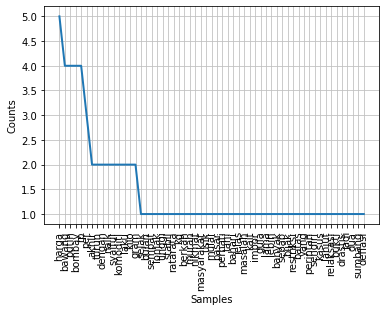

In [11]:
#Plot
tf.plot(cumulative=False)
plt.show()

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True